### Calculation of trading profit by comparing Close price and SMA

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
cd market_profile

[WinError 2] The system cannot find the file specified: 'market_profile'
C:\Users\19492\OneDrive\Desktop\FinTech\ESG\market_profile\Datasets


In [10]:
esg_df = pd.read_csv(".\Datasets\esg_082722.csv", index_col=False)
esg_df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-07-18 15:30:00-04:00,115.250000,115.250000,114.459999,115.080002,277271,0,0
1,2022-07-19 15:30:00-04:00,118.930000,119.339996,118.779999,118.949997,245516,0,0
2,2022-07-20 15:30:00-04:00,120.510002,120.510002,119.830002,119.849998,251715,0,0
3,2022-07-21 09:30:00-04:00,122.120003,127.339996,122.120003,126.144997,422133,0,0
4,2022-07-21 10:30:00-04:00,125.910004,126.690002,125.750000,126.510002,233159,0,0
...,...,...,...,...,...,...,...,...
188,2022-08-26 12:30:00-04:00,131.589996,132.085007,131.365005,132.050003,92201,0,0
189,2022-08-26 13:30:00-04:00,132.000000,132.000000,130.360001,130.404999,100237,0,0
190,2022-08-26 14:30:00-04:00,130.320007,130.500000,129.779999,130.080002,158085,0,0
191,2022-08-26 15:30:00-04:00,130.042496,130.164993,129.779999,129.860001,230684,0,0


In [11]:
#c = pd.read_csv("esg_082122.csv", sep=",", names=['Datetime','Open','High','Low','Close','Volume', 'Dividends', 'StockSplits'])


In [12]:
#df= pd.read_csv('esg_082122.csv', index_col='Datetime', parse_dates=True)

In [13]:
esg_df['Date'] = esg_df['Datetime'].str.split(' ').str[0]
esg_df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,2022-07-18 15:30:00-04:00,115.250000,115.250000,114.459999,115.080002,277271,0,0,2022-07-18
1,2022-07-19 15:30:00-04:00,118.930000,119.339996,118.779999,118.949997,245516,0,0,2022-07-19
2,2022-07-20 15:30:00-04:00,120.510002,120.510002,119.830002,119.849998,251715,0,0,2022-07-20
3,2022-07-21 09:30:00-04:00,122.120003,127.339996,122.120003,126.144997,422133,0,0,2022-07-21
4,2022-07-21 10:30:00-04:00,125.910004,126.690002,125.750000,126.510002,233159,0,0,2022-07-21
...,...,...,...,...,...,...,...,...,...
188,2022-08-26 12:30:00-04:00,131.589996,132.085007,131.365005,132.050003,92201,0,0,2022-08-26
189,2022-08-26 13:30:00-04:00,132.000000,132.000000,130.360001,130.404999,100237,0,0,2022-08-26
190,2022-08-26 14:30:00-04:00,130.320007,130.500000,129.779999,130.080002,158085,0,0,2022-08-26
191,2022-08-26 15:30:00-04:00,130.042496,130.164993,129.779999,129.860001,230684,0,0,2022-08-26


In [14]:
esg_close=esg_df[['Date','Datetime', 'Close']]
print(esg_close)

           Date                   Datetime       Close
0    2022-07-18  2022-07-18 15:30:00-04:00  115.080002
1    2022-07-19  2022-07-19 15:30:00-04:00  118.949997
2    2022-07-20  2022-07-20 15:30:00-04:00  119.849998
3    2022-07-21  2022-07-21 09:30:00-04:00  126.144997
4    2022-07-21  2022-07-21 10:30:00-04:00  126.510002
..          ...                        ...         ...
188  2022-08-26  2022-08-26 12:30:00-04:00  132.050003
189  2022-08-26  2022-08-26 13:30:00-04:00  130.404999
190  2022-08-26  2022-08-26 14:30:00-04:00  130.080002
191  2022-08-26  2022-08-26 15:30:00-04:00  129.860001
192  2022-08-26  2022-08-26 16:00:00-04:00  129.869995

[193 rows x 3 columns]


In [15]:
esg_close_df=esg_close.sort_values(by='Datetime', ascending=False).groupby('Date', as_index=False).nth(0)
esg_close_df

,Date,Datetime,Close
192,2022-08-26,2022-08-26 16:00:00-04:00,129.869995
184,2022-08-25,2022-08-25 15:30:00-04:00,136.050003
177,2022-08-24,2022-08-24 15:30:00-04:00,133.660004
170,2022-08-23,2022-08-23 15:30:00-04:00,132.630005
163,2022-08-22,2022-08-22 15:30:00-04:00,133.979996
156,2022-08-19,2022-08-19 15:30:00-04:00,137.610001
149,2022-08-18,2022-08-18 15:30:00-04:00,140.089996
142,2022-08-17,2022-08-17 15:30:00-04:00,142.250000
135,2022-08-16,2022-08-16 15:30:00-04:00,132.759995
128,2022-08-15,2022-08-15 15:30:00-04:00,133.960007


In [16]:
esg_close_df.shape

(30, 3)

In [17]:
esg_close_df2=esg_close_df.sort_values(by='Datetime', ascending=True)
esg_close_df3=esg_close_df2.drop('Datetime', axis=1)
esg_close_df3

,Date,Close
0,2022-07-18,115.080002
1,2022-07-19,118.949997
2,2022-07-20,119.849998
9,2022-07-21,127.169998
16,2022-07-22,125.059998
23,2022-07-25,124.209999
30,2022-07-26,125.180000
37,2022-07-27,127.680000
44,2022-07-28,131.070007
51,2022-07-29,134.110001


In [18]:
a=esg_close_df['Close'].max()
esg_close_df.loc[esg_close_df['Close'] == a]

,Date,Datetime,Close
142,2022-08-17,2022-08-17 15:30:00-04:00,142.25


In [19]:
#esg_close_df2.index = pd.to_datetime(esg_close_df2.index )
df=esg_close_df3.set_index('Date')
df

,Close
Date,
2022-07-18,115.080002
2022-07-19,118.949997
2022-07-20,119.849998
2022-07-21,127.169998
2022-07-22,125.059998
2022-07-25,124.209999
2022-07-26,125.180000
2022-07-27,127.680000
2022-07-28,131.070007


<AxesSubplot:xlabel='Date'>

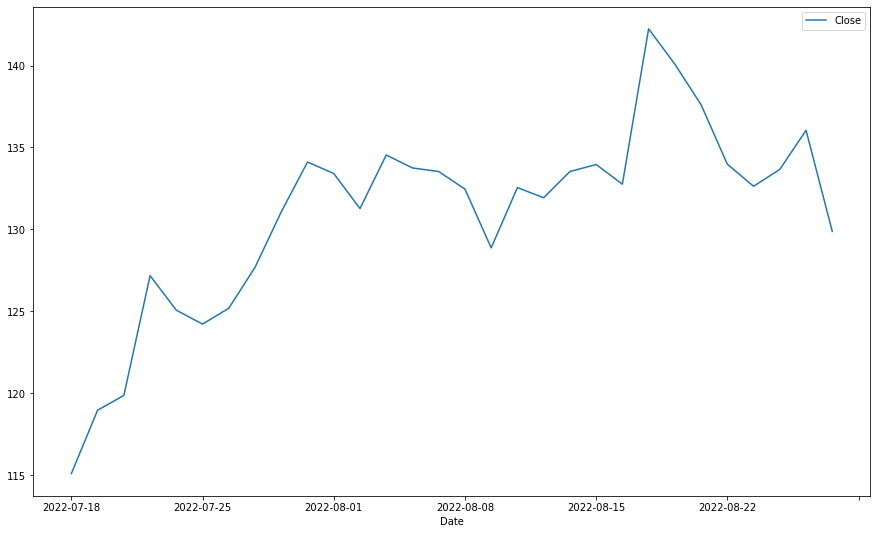

In [20]:
df.plot(figsize=(15,9))

In [21]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

,Close
Date,
2022-07-19,0.033629
2022-07-20,0.007566
2022-07-21,0.061076
2022-07-22,-0.016592
2022-07-25,-0.006797


array([<AxesSubplot:xlabel='Date'>], dtype=object)

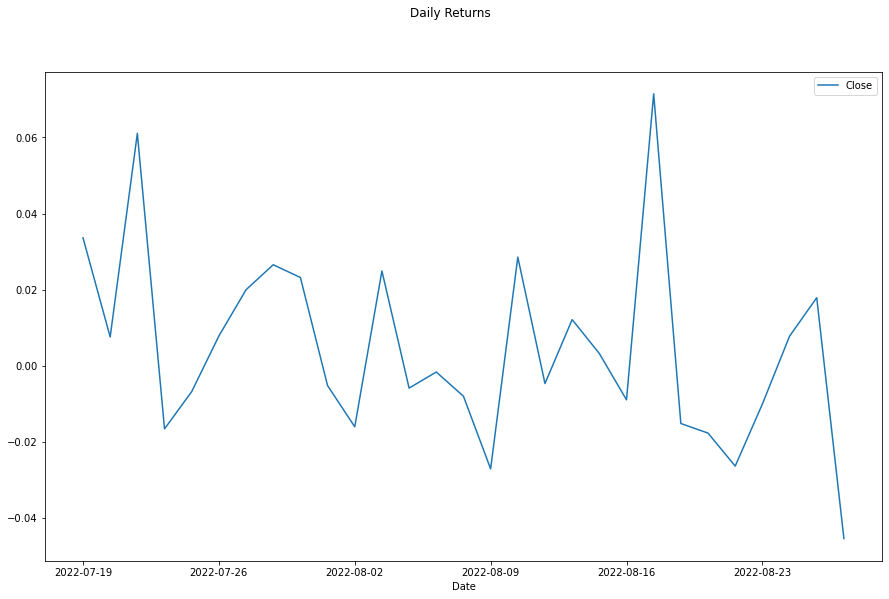

In [22]:
daily_returns.plot.line(subplots=True, figsize=(15,9), title="Daily Returns")

In [23]:
cumulative_returns = (1+ daily_returns).cumprod()
cumulative_returns.head()

,Close
Date,
2022-07-19,1.033629
2022-07-20,1.041449
2022-07-21,1.105057
2022-07-22,1.086722
2022-07-25,1.079336


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

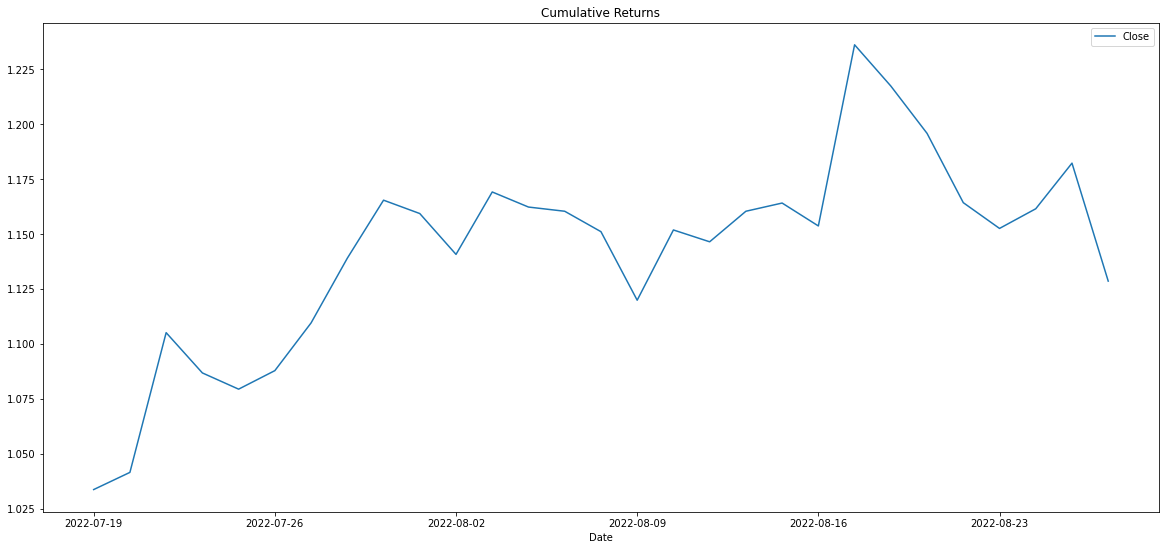

In [24]:
cumulative_returns.plot(figsize=(20,9), title="Cumulative Returns")

In [26]:
rollingStock=df
#rollingStock=rollingStock['Close'].to_frame()
rollingStock['SMA']=rollingStock['Close'].rolling(2).mean()
rollingStock['Diff']=rollingStock['Close']-rollingStock['SMA']
rollingStock.dropna(inplace=True)
rollingStock

,Close,SMA,Diff
Date,,,
2022-07-19,118.949997,117.014999,1.934998
2022-07-20,119.849998,119.399998,0.450001
2022-07-21,127.169998,123.509998,3.660000
2022-07-22,125.059998,126.114998,-1.055000
2022-07-25,124.209999,124.634998,-0.424999
2022-07-26,125.180000,124.695000,0.485001
2022-07-27,127.680000,126.430000,1.250000
2022-07-28,131.070007,129.375004,1.695003
2022-07-29,134.110001,132.590004,1.519997


In [28]:
#rollingStock.drop(col="SMA30", axis=1)

In [29]:
rollingStock['IsGreater'] = rollingStock['Diff'] > 0

In [30]:
rollingStock['WentAbove'] = (rollingStock['IsGreater'] == True) & (rollingStock['IsGreater'].shift(1) == False)
rollingStock.head()

,Close,SMA,Diff,IsGreater,WentAbove
Date,,,,,
2022-07-19,118.949997,117.014999,1.934998,True,False
2022-07-20,119.849998,119.399998,0.450001,True,False
2022-07-21,127.169998,123.509998,3.660000,True,False
2022-07-22,125.059998,126.114998,-1.055000,False,False
2022-07-25,124.209999,124.634998,-0.424999,False,False


In [31]:
rollingStock['Profit'] = (rollingStock['Close'].shift(-3) - rollingStock['Close']) / rollingStock['Close']
rollingStock.dropna()

,Close,SMA,Diff,IsGreater,WentAbove,Profit
Date,,,,,,
2022-07-19,118.949997,117.014999,1.934998,True,False,0.051366
2022-07-20,119.849998,119.399998,0.450001,True,False,0.036379
2022-07-21,127.169998,123.509998,3.660000,True,False,-0.015648
2022-07-22,125.059998,126.114998,-1.055000,False,False,0.020950
2022-07-25,124.209999,124.634998,-0.424999,False,False,0.055229
2022-07-26,125.180000,124.695000,0.485001,True,True,0.071337
2022-07-27,127.680000,126.430000,1.250000,True,False,0.044878
2022-07-28,131.070007,129.375004,1.695003,True,False,0.001526
2022-07-29,134.110001,132.590004,1.519997,True,False,0.003206


In [32]:
WentAboveProfit = rollingStock[rollingStock['WentAbove']== True]
WentAboveProfit.dropna(inplace=True)
WentAboveProfit

C:\Users\19492\anaconda33\envs\dev2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Close,SMA,Diff,IsGreater,WentAbove,Profit
Date,,,,,,
2022-07-26,125.180000,124.695000,0.485001,True,True,0.071337
2022-08-03,134.539993,132.904999,1.634995,True,True,-0.015460
2022-08-10,132.550003,130.709999,1.840004,True,True,0.010638
2022-08-12,133.529999,132.729996,0.800003,True,True,0.065304
2022-08-17,142.250000,137.504997,4.745003,True,True,-0.058137


## Moving Average as predictive model

In [90]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [91]:
#series_df = pd.read_csv(".\Datasets\esg_082722.csv", index_col=False)
series = read_csv(".\Datasets\AAPL_2019_22.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
series

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-03,51.607498,51.744999,51.055000,51.424999,50.312439,80092000
2019-09-04,52.097500,52.369999,51.830002,52.297501,51.166061,76752400
2019-09-05,53.000000,53.492500,52.877499,53.320000,52.166443,95654800
2019-09-06,53.512501,53.605000,53.127499,53.314999,52.161549,77449200
2019-09-09,53.709999,54.110001,52.767502,53.542500,52.384125,109237600
...,...,...,...,...,...,...
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000
2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100


In [92]:
series_close=series['Close']
series_close

Date
2019-09-03     51.424999
2019-09-04     52.297501
2019-09-05     53.320000
2019-09-06     53.314999
2019-09-09     53.542500
                 ...    
2022-08-29    161.380005
2022-08-30    158.910004
2022-08-31    157.220001
2022-09-01    157.960007
2022-09-02    155.809998
Name: Close, Length: 758, dtype: float64

In [93]:
series_close.squeeze()
X=series_close.values
X

array([ 51.424999,  52.297501,  53.32    ,  53.314999,  53.5425  ,
        54.174999,  55.897499,  55.772499,  54.6875  ,  54.974998,
        55.174999,  55.692501,  55.240002,  54.432499,  54.68    ,
        54.419998,  55.2575  ,  54.9725  ,  54.705002,  55.9925  ,
        56.147499,  54.740002,  55.205002,  56.752499,  56.764999,
        56.099998,  56.7575  ,  57.522499,  59.052502,  58.967499,
        58.830002,  58.592499,  58.82    ,  59.102501,  60.127499,
        59.990002,  60.794998,  60.895   ,  61.645   ,  62.262501,
        60.822498,  60.814999,  62.189999,  63.955002,  64.375   ,
        64.282501,  64.309998,  64.857498,  65.035004,  65.550003,
        65.489998,  66.1175  ,  65.660004,  66.440002,  66.775002,
        66.572502,  65.797501,  65.502502,  65.445   ,  66.592499,
        66.072502,  66.959999,  66.8125  ,  66.040001,  64.862503,
        65.434998,  66.394997,  67.677498,  66.730003,  67.120003,
        67.692497,  67.864998,  68.787498,  69.964996,  70.102

In [105]:

#X = series.values
window=3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length - window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=52.347500, expected=53.314999
predicted=52.977500, expected=53.542500
predicted=53.392500, expected=54.174999
predicted=53.677499, expected=55.897499
predicted=54.538333, expected=55.772499
predicted=55.281666, expected=54.687500
predicted=55.452499, expected=54.974998
predicted=55.144999, expected=55.174999
predicted=54.945832, expected=55.692501
predicted=55.280833, expected=55.240002
predicted=55.369167, expected=54.432499
predicted=55.121667, expected=54.680000
predicted=54.784167, expected=54.419998
predicted=54.510832, expected=55.257500
predicted=54.785833, expected=54.972500
predicted=54.883333, expected=54.705002
predicted=54.978334, expected=55.992500
predicted=55.223334, expected=56.147499
predicted=55.615000, expected=54.740002
predicted=55.626667, expected=55.205002
predicted=55.364168, expected=56.752499
predicted=55.565834, expected=56.764999
predicted=56.240833, expected=56.099998
predicted=56.539165, expected=56.757500
predicted=56.540832, expected=57.522499


In [106]:
rmse=sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.054


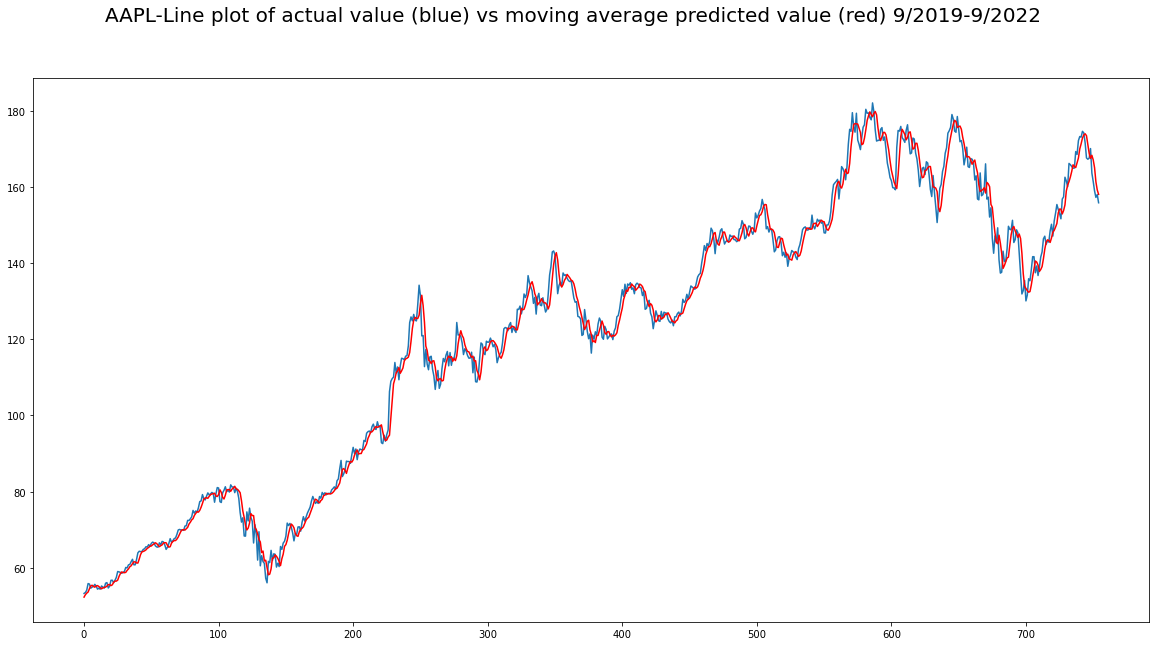

In [107]:
fig=plt.figure(figsize=(20, 10))
fig.suptitle('AAPL-Line plot of actual value (blue) vs moving average predicted value (red) 9/2019-9/2022', fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

